In [1]:
#6.1.4 Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#6.1.4 Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#6.1.4 Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
#6.1.4 Use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-84.06611171108977 -36.73324778054271
39.40250669948276 179.4454140764865
-9.120040496633663 105.08851348543664
-18.142135891351984 -70.66073893516982
59.13328813062239 -29.736963829204257
29.721236247611657 -17.990064698061786
-15.84883996632982 -7.043199372336858
-9.581118785320399 -151.43114987342835
31.986787869764143 -146.80921369978864
-45.260264763728685 -93.61915329641013
-32.443117017897904 10.97273784556981
74.60078384868612 -125.72313009251249
-73.79197367527016 58.35983120741895
-83.06758980810153 128.6148403329076
82.84536605512534 58.52224836542379
-66.84159776154218 3.4155743940248158
46.93254920911997 56.65071725866261
66.97160308350831 -49.08708220062715
-89.00324565020497 84.49363890913156
43.406633258485954 67.96042854571698
37.125077938299185 24.20171039489111
-50.823570872744014 -109.87387437287444
-15.826480911214517 62.40130187232478
-74.74493254685035 146.84317114186143
-71.6452661904346 -171.53609737360108
-61.467365823868604 -120.7372509423342
-16.300018435885

86.88943438435643 53.031853428471436
58.97436534792925 -172.36718757590188
54.06726625690746 141.6346042285183
29.781829095776914 154.92932502330905
-59.202661912600504 119.42406323887587
21.81426509789631 136.41916787790854
-22.51825481949399 81.90749967647548
7.918455085672363 -67.67175365441935
47.81561554847238 10.350345563047426
-70.82608852784477 114.0093422504911
8.492454630792764 80.09466205334877
-18.467639188789676 -127.13492046569709
-75.37867803806566 -30.240773794910723
59.82414636666556 -84.08367215548611
80.23495575969662 -64.23085789928402
32.557081250072926 -2.3528198205897866
-33.87047049150836 -121.13406289096281
68.26696260263006 87.71025485625296
-36.79600919272565 -173.7404772201623
29.417500770136144 93.03864739216453
12.216954062292018 174.04583950386177
21.405705719958476 49.76305730684729
-82.71998065868438 53.58630962903095
-84.95292923841902 50.42382593223181
-64.19087765223509 -42.66722843839463
-19.482041445068987 111.82236005820715
-56.114173899829304 112

-55.556091486454264 108.56735975839212
40.70719028556641 -124.93038258532567
-3.3275249925488026 -46.60980866414627
8.706765463831687 101.03988702999925
75.93991891612038 114.53017079883807
76.31355614901685 -160.00905315096176
14.12950096530156 -11.603664316607762
-88.00532778686153 152.8918191548209
-85.33891568179253 -47.37484803064339
-28.807516808989057 -112.38854330301828
-1.5626341824915357 -117.66025795794104
45.93026677772755 6.974878959363053
-88.15165681948521 16.794721503166954
-64.55062569515111 -18.323122480820928
55.515404359872974 -6.244573107220646
-47.340605731130275 -107.29461632765098
-48.43448354715417 -178.86393446568457
21.466044799233487 -73.31261393096378
-70.47090277262033 36.17363571912526
58.65007187914185 64.70732612070054


In [5]:
#6.1.5 import citipy
from citipy import citipy


In [6]:
#6.1.5 Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [7]:
#6.2.3 import the requests library
import requests

# import the API key
from config import weather_api_key

In [8]:
#6.2.3 starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
#6.2.6 import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [10]:
#6.2.6 Create an empty list to hold the weather data
city_data =[]
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
          
#6.2.6 Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 4 of Set 1 | tacna
Processing Record 5 of Set 1 | olafsvik
Processing Record 6 of Set 1 | santa cruz de la palma
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | faanui
Processing Record 9 of Set 1 | kahului
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | oranjemund
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | shubarshi
Processing Record 18 of Set 1 | qasigiannguit
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | turkistan
Processing

Processing Record 37 of Set 4 | kuandian
Processing Record 38 of Set 4 | pierre
Processing Record 39 of Set 4 | broome
Processing Record 40 of Set 4 | aklavik
Processing Record 41 of Set 4 | jujuy
City not found. Skipping...
Processing Record 42 of Set 4 | hofn
Processing Record 43 of Set 4 | port elizabeth
Processing Record 44 of Set 4 | general roca
Processing Record 45 of Set 4 | carnarvon
Processing Record 46 of Set 4 | tlyarota
City not found. Skipping...
Processing Record 47 of Set 4 | pathein
Processing Record 48 of Set 4 | arman
Processing Record 49 of Set 4 | lagoa
Processing Record 50 of Set 4 | aykhal
Processing Record 1 of Set 5 | terney
Processing Record 2 of Set 5 | qinhuangdao
Processing Record 3 of Set 5 | ponnani
Processing Record 4 of Set 5 | esperance
Processing Record 5 of Set 5 | souillac
Processing Record 6 of Set 5 | asayita
City not found. Skipping...
Processing Record 7 of Set 5 | riyadh
Processing Record 8 of Set 5 | sitka
Processing Record 9 of Set 5 | faya
P

Processing Record 27 of Set 8 | qarchi gak
Processing Record 28 of Set 8 | balabac
Processing Record 29 of Set 8 | yar-sale
Processing Record 30 of Set 8 | jerantut
Processing Record 31 of Set 8 | shihezi
Processing Record 32 of Set 8 | panjakent
Processing Record 33 of Set 8 | ilulissat
Processing Record 34 of Set 8 | vung tau
Processing Record 35 of Set 8 | umea
Processing Record 36 of Set 8 | yaring
Processing Record 37 of Set 8 | zyryanka
Processing Record 38 of Set 8 | buala
Processing Record 39 of Set 8 | udachnyy
Processing Record 40 of Set 8 | onokhoy
Processing Record 41 of Set 8 | saskylakh
Processing Record 42 of Set 8 | krasnovishersk
Processing Record 43 of Set 8 | lar gerd
City not found. Skipping...
Processing Record 44 of Set 8 | skalistyy
City not found. Skipping...
Processing Record 45 of Set 8 | juneau
Processing Record 46 of Set 8 | lillooet
Processing Record 47 of Set 8 | codrington
Processing Record 48 of Set 8 | panaba
Processing Record 49 of Set 8 | kidal
Proces

Processing Record 18 of Set 12 | namibe
Processing Record 19 of Set 12 | yumen
Processing Record 20 of Set 12 | abnub
Processing Record 21 of Set 12 | darab
Processing Record 22 of Set 12 | sestri levante
Processing Record 23 of Set 12 | fortuna
Processing Record 24 of Set 12 | alofi
Processing Record 25 of Set 12 | yelizovo
Processing Record 26 of Set 12 | constitucion
Processing Record 27 of Set 12 | michigan city
Processing Record 28 of Set 12 | barbar
City not found. Skipping...
Processing Record 29 of Set 12 | rungata
City not found. Skipping...
Processing Record 30 of Set 12 | tautira
Processing Record 31 of Set 12 | znamenka
Processing Record 32 of Set 12 | balao
Processing Record 33 of Set 12 | pitimbu
Processing Record 34 of Set 12 | baoshan
Processing Record 35 of Set 12 | roma
Processing Record 36 of Set 12 | hihifo
City not found. Skipping...
Processing Record 37 of Set 12 | mackay
Processing Record 38 of Set 12 | anacortes
Processing Record 39 of Set 12 | henties bay
Proce

In [11]:
len(city_data)

578

In [12]:
#6.2.7 Convert the array of dictionaries to a Pandas Dataframe
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-07-19 02:41:29,-54.8000,-68.3000,33.46,93,75,9.22
1,Nikolskoye,RU,2022-07-19 02:44:35,59.7035,30.7861,54.88,82,84,3.78
2,Tacna,PE,2022-07-19 02:39:38,-18.0056,-70.2483,52.70,82,100,0.81
3,Olafsvik,IS,2022-07-19 02:44:36,64.8945,-23.7142,52.81,78,100,8.75
4,Santa Cruz De La Palma,ES,2022-07-19 02:44:36,28.6835,-17.7642,71.74,78,100,16.11


In [13]:
#6.2.7 Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
#6.3.1 Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

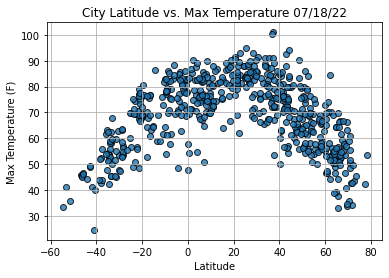

In [17]:
#6.3.1 Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Citites")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

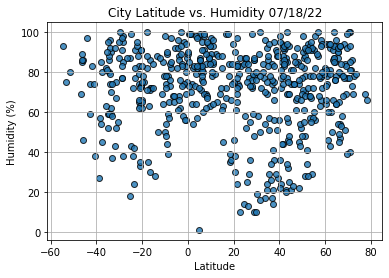

In [19]:
#6.3.2 Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

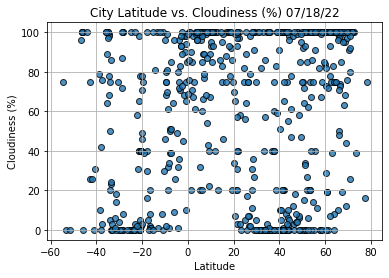

In [20]:
#6.3.3 Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

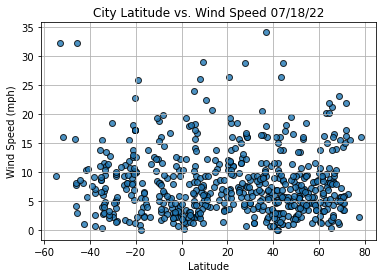

In [21]:
#6.3.4 Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor ="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [34]:
#6.4.2 Import linregreess
from scipy.stats import linregress

#Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
    
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [35]:
#6.4.2 Return information on a specific city (given by the index) in the city_data_df
index13 = city_data_df.loc[13]
index13

City                    Shubarshi
Country                        KZ
Date          2022-07-19 02:44:40
Lat                       48.5872
Lng                       57.1869
Max Temp                    90.43
Humidity                       22
Cloudiness                      6
Wind Speed                  16.53
Name: 13, dtype: object

In [36]:
#6.4.1 filter the city_data_df to show all northern hemisphere latitudes
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4       True
       ...  
573    False
574     True
575     True
576     True
577     True
Name: Lat, Length: 578, dtype: bool

In [37]:
#6.4.1 Use a filter and loc method to return all the data fitting latitudes greater than or euqal to 0
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Nikolskoye,RU,2022-07-19 02:44:35,59.7035,30.7861,54.88,82,84,3.78
3,Olafsvik,IS,2022-07-19 02:44:36,64.8945,-23.7142,52.81,78,100,8.75
4,Santa Cruz De La Palma,ES,2022-07-19 02:44:36,28.6835,-17.7642,71.74,78,100,16.11
5,Jamestown,US,2022-07-19 02:44:37,42.0970,-79.2353,71.19,91,20,10.36
7,Kahului,US,2022-07-19 02:44:03,20.8947,-156.4700,82.42,61,20,26.46


In [41]:
#6.4.1 Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

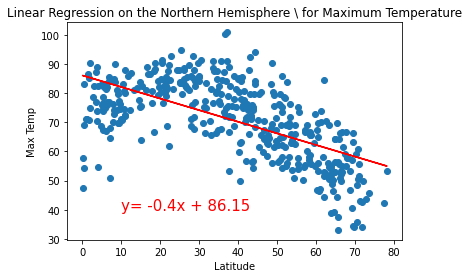

In [42]:
#6.4.1 Linear regression on the Northern Hemisphere for latitude and max temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp', (10,40))

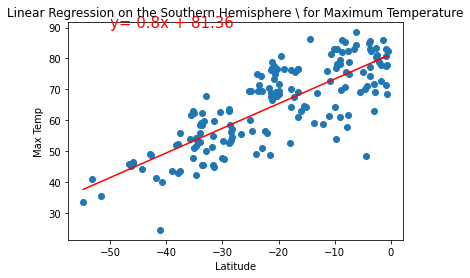

In [45]:
#6.4.1 Linear regression on the Southern Hemisphere for latitude and max temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp', (-50,90))

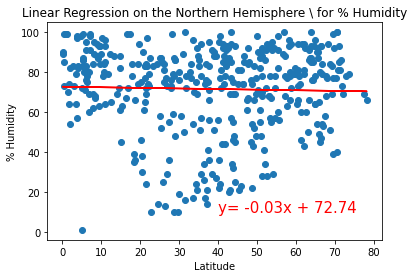

In [47]:
#6.4.3 Linear regression on the Northern hemisphere for latitude and % humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \ for % Humidity', "% Humidity", (40,10))

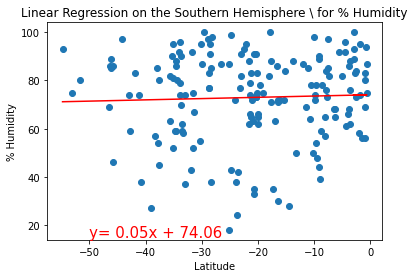

In [48]:
#6.4.3 Linear regression on the Southern hemisphere for latitude and % humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \ for % Humidity', "% Humidity", (-50,15))

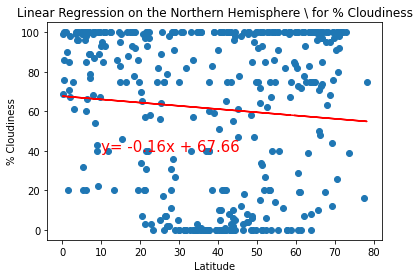

In [50]:
#6.4.4 Linear regression on the Northern hemisphere for latitude and % cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \ for % Cloudiness', '% Cloudiness', (10,40))

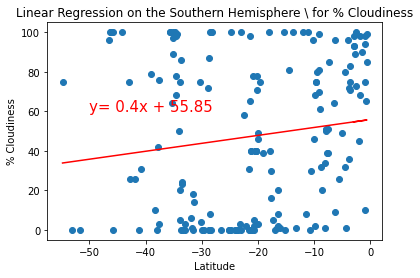

In [52]:
#6.4.4 Linear regression on the Southern hemisphere for latitude and % cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \ for % Cloudiness', '% Cloudiness', (-50,60))

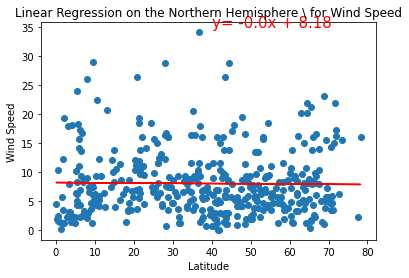

In [53]:
#6.4.5 Linear regression on the Northern hemisphere for latitude and wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \ for Wind Speed', 'Wind Speed', (40,35))

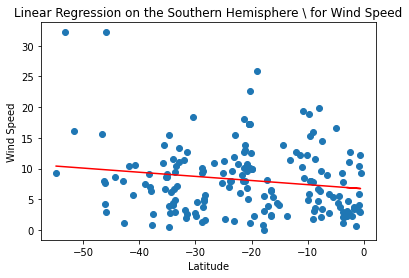

In [54]:
#6.4.4 Linear regression on the Southern hemisphere for latitude and wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \ for Wind Speed', 'Wind Speed', (-50,35))